# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [1]:
# pip install scikit-learn --upgrade

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import math
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
from sklearn.preprocessing import StandardScaler

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
186,0,22.0,50800.0,0,0
3747,0,29.0,42900.0,4,0
3997,0,25.0,18700.0,2,0
4327,0,39.0,36600.0,0,0
2615,1,35.0,43200.0,2,0
2483,1,33.0,53000.0,1,0
2610,1,48.0,57800.0,0,1
4175,0,25.0,42100.0,2,0
4486,1,18.0,41900.0,1,0
4824,1,20.0,46500.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial

# escribe tu conversión aquí si lo deseas:

df['age'] = df['age'].astype(int)

In [8]:
# comprueba que la conversión se haya realizado con éxito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?

df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [10]:
df.head(10)

,gender,age,income,family_members,insurance_benefits
0,1,41,49600.0,1,0
1,0,46,38000.0,1,1
2,0,29,21000.0,0,0
3,0,21,41700.0,2,0
4,1,28,26100.0,0,0
5,1,43,41000.0,2,1
6,1,39,39700.0,2,0
7,1,25,38600.0,4,0
8,1,36,49700.0,1,0
9,1,32,51700.0,1,0


In [11]:
print(df[df.duplicated()])

      gender  age   income  family_members  insurance_benefits
281        1   39  48100.0               1                   0
488        1   24  32900.0               1                   0
513        0   31  37400.0               2                   0
718        1   22  32600.0               1                   0
785        0   20  35800.0               0                   0
...      ...  ...      ...             ...                 ...
4793       1   24  37800.0               0                   0
4902       1   35  38700.0               1                   0
4935       1   19  32700.0               0                   0
4945       1   21  45800.0               0                   0
4965       0   22  40100.0               1                   0

[153 rows x 5 columns]


In [12]:
df.drop_duplicates(inplace= True)

## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

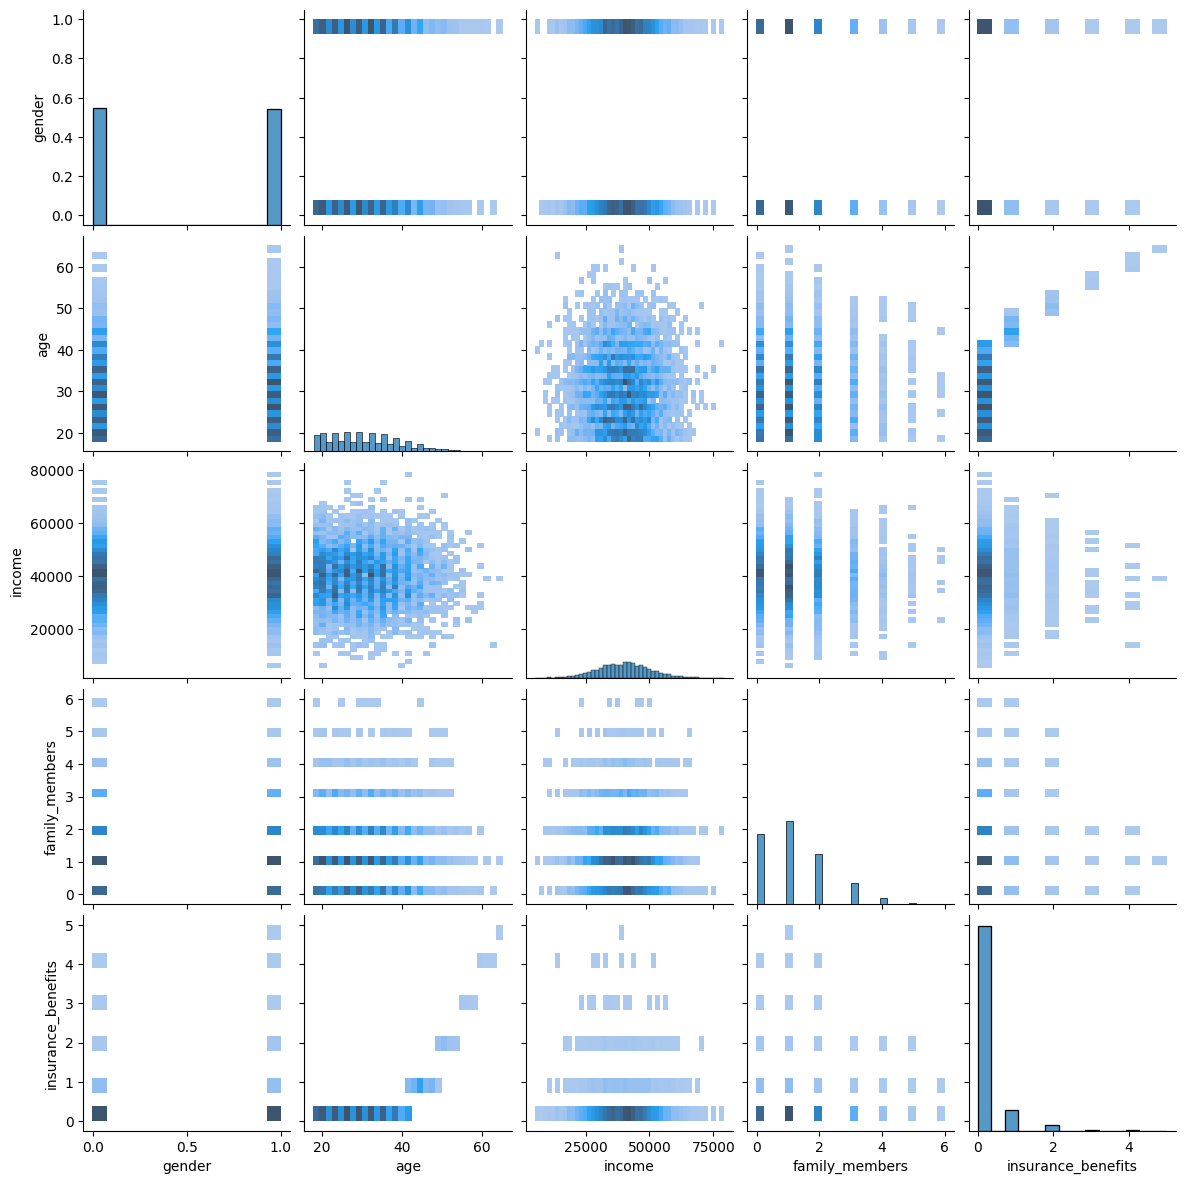

In [13]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [14]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [15]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos
    
    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    
    :param n: número de objetos para los que se buscan los vecinos más cercanos    
    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    
    
    """
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric) # <tu código aquí> 
    nbrs.fit(df[feature_names].copy())
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Escalar datos.

In [16]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [17]:
#df_scaled.sample(5)

In [18]:
df['insurance_benefits'].unique()

array([0, 1, 2, 3, 5, 4])

Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [19]:
# Ejemplo de uso
n = 0  # índice del objeto para el cual buscamos vecinos
k = 3  # número de vecinos más cercanos a devolver

# Sin escalado, métrica euclidiana
print("Sin escalado, métrica euclidiana:")
print(get_knn(df, n, k, 'euclidean'))

Sin escalado, métrica euclidiana:
      gender   age   income  family_members  insurance_benefits  distance
0        1.0  41.0  49600.0             1.0                 0.0  0.000000
1214     NaN   NaN      NaN             NaN                 NaN  1.732051
1225     0.0  42.0  49600.0             0.0                 1.0       NaN
1992     NaN   NaN      NaN             NaN                 NaN  1.000000
2022     1.0  41.0  49600.0             0.0                 0.0       NaN


In [20]:
# Sin escalado, métrica Manhattan
print("Sin escalado, métrica Manhattan:")
print(get_knn(df, n, k, 'manhattan'))

Sin escalado, métrica Manhattan:
      gender   age   income  family_members  insurance_benefits  distance
0        1.0  41.0  49600.0             1.0                 0.0       0.0
1214     NaN   NaN      NaN             NaN                 NaN       3.0
1225     0.0  42.0  49600.0             0.0                 1.0       NaN
1992     NaN   NaN      NaN             NaN                 NaN       1.0
2022     1.0  41.0  49600.0             0.0                 0.0       NaN


In [21]:
# Con escalado, métrica euclidiana
print("Con escalado, métrica euclidiana:")
print(get_knn(df_scaled, n, k, 'euclidean'))

Con escalado, métrica euclidiana:
      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                 0.0  0.000000
133      1.0  0.615385  0.636709        0.166667                 0.0  0.017754
2632     NaN       NaN       NaN             NaN                 NaN  0.006329
2689     1.0  0.630769  0.634177        0.166667                 0.0       NaN


In [22]:
# Con escalado, métrica Manhattan
print("Con escalado, métrica Manhattan:")
print(get_knn(df_scaled, n, k, 'manhattan'))

Con escalado, métrica Manhattan:
      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                 0.0  0.000000
133      1.0  0.615385  0.636709        0.166667                 0.0  0.024245
2632     NaN       NaN       NaN             NaN                 NaN  0.006329
2689     1.0  0.630769  0.634177        0.166667                 0.0       NaN


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Sí, el hecho de que los datos no estén escalados afecta al algoritmo kNN. Las características con mayores rangos (por ejemplo, 'income') tendrán una mayor influencia en las distancias calculadas, lo que puede distorsionar los resultados. El escalado ayuda a igualar la influencia de cada característica.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Los resultados pueden variar al usar la métrica de distancia Manhattan en comparación con la métrica euclidiana. La métrica Manhattan calcula la distancia como la suma de las diferencias absolutas entre las características, mientras que la métrica euclidiana considera la raíz cuadrada de la suma de las diferencias al cuadrado. Por lo tanto, la métrica seleccionada puede producir diferentes conjuntos de vecinos más cercanos.

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [23]:
# сalcula el objetivo
df.loc[df['insurance_benefits'] > 0, 'insurance_benefits_received'] = df['insurance_benefits']
df['insurance_benefits_received'].fillna(0, inplace= True)
df['insurance_benefits_received'] = df['insurance_benefits_received'].astype(int)
#<tu código aquí>

In [24]:
 print(df['insurance_benefits_received'].unique())

[0 1 2 3 5 4]


In [25]:
df['insurance_benefits_received'].replace(['2', '3', '4', '5'], '1')
df['insurance_benefits_received'] = df['insurance_benefits_received'].replace({2: 1, 3: 1, 4: 1, 5: 1})

In [26]:
print(df)

      gender  age   income  family_members  insurance_benefits  \
0          1   41  49600.0               1                   0   
1          0   46  38000.0               1                   1   
2          0   29  21000.0               0                   0   
3          0   21  41700.0               2                   0   
4          1   28  26100.0               0                   0   
...      ...  ...      ...             ...                 ...   
4995       0   28  35700.0               2                   0   
4996       0   34  52400.0               1                   0   
4997       0   20  33900.0               2                   0   
4998       1   22  32700.0               3                   0   
4999       1   28  40600.0               1                   0   

      insurance_benefits_received  
0                               0  
1                               1  
2                               0  
3                               0  
4                          

In [27]:
# comprueba el desequilibrio de clases con value_counts()

df['insurance_benefits_received'].value_counts(normalize= True)

# <tu código aquí>

0    0.883846
1    0.116154
Name: insurance_benefits_received, dtype: float64

In [28]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [29]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [30]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(df))
    
    # <tu código aquí> 
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

La probabilidad: 0.12
F1: 0.13
Matriz de confusión
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

La probabilidad: 0.50
F1: 0.19
Matriz de confusión
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

La probabilidad: 1.00
F1: 0.21
Matriz de confusión
[[0.         0.88384568]
 [0.         0.11615432]]



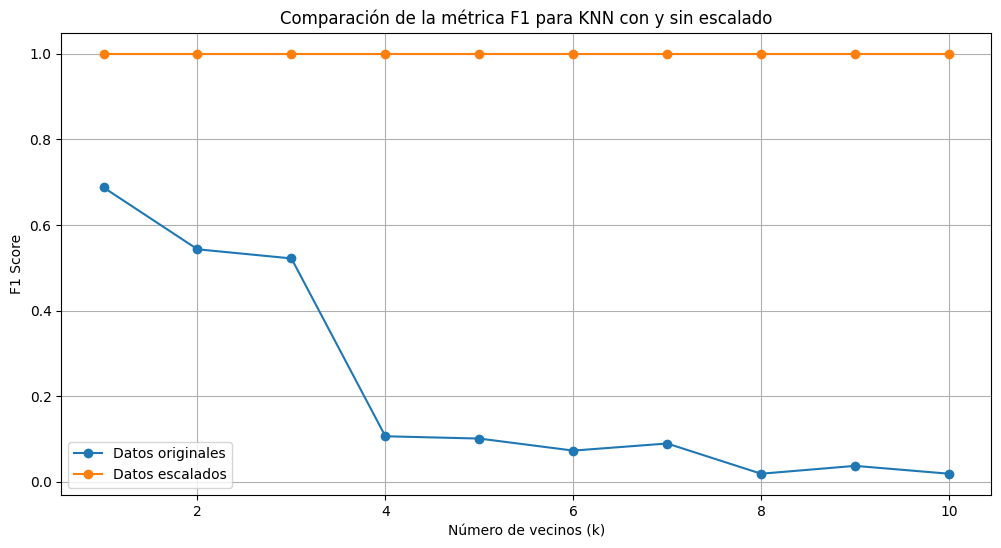

k=1: F1 Score original=0.6875, F1 Score escalado=1.0000
k=2: F1 Score original=0.5430, F1 Score escalado=1.0000
k=3: F1 Score original=0.5217, F1 Score escalado=1.0000
k=4: F1 Score original=0.1062, F1 Score escalado=1.0000
k=5: F1 Score original=0.1008, F1 Score escalado=1.0000
k=6: F1 Score original=0.0727, F1 Score escalado=1.0000
k=7: F1 Score original=0.0893, F1 Score escalado=1.0000
k=8: F1 Score original=0.0187, F1 Score escalado=1.0000
k=9: F1 Score original=0.0370, F1 Score escalado=1.0000
k=10: F1 Score original=0.0187, F1 Score escalado=1.0000


In [31]:
# Separar características y variable objetivo
features = df.drop(columns=['insurance_benefits_received'])
target = df['insurance_benefits_received']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicializar listas para almacenar los resultados
f1_scores_original = []
f1_scores_scaled = []

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluar para k = 1...10
k_values = range(1, 11)
for k in k_values:
    # Modelo KNN con datos originales
    knn_original = KNeighborsClassifier(n_neighbors=k)
    knn_original.fit(X_train, y_train)
    y_pred_original = knn_original.predict(X_test)
    f1_original = f1_score(y_test, y_pred_original)
    f1_scores_original.append(f1_original)
    
    # Modelo KNN con datos escalados
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = knn_scaled.predict(X_test_scaled)
    f1_scaled = f1_score(y_test, y_pred_scaled)
    f1_scores_scaled.append(f1_scaled)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(k_values, f1_scores_original, marker='o', label='Datos originales')
plt.plot(k_values, f1_scores_scaled, marker='o', label='Datos escalados')
plt.title('Comparación de la métrica F1 para KNN con y sin escalado')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los resultados
for k in k_values:
    print(f"k={k}: F1 Score original={f1_scores_original[k-1]:.4f}, F1 Score escalado={f1_scores_scaled[k-1]:.4f}")

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [32]:
class MyLinearRegression:
    
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # calcular los pesos usando la fórmula analítica
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        return y_pred

In [33]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [34]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [35]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [36]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [37]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [38]:
def is_invertible(matrix):
    return np.linalg.det(matrix) != 0


print("La matriz es invertible:", is_invertible(P))

La matriz es invertible: True


In [39]:
X_transformed = X @ P

# Recuperar los datos originales
P_inv = np.linalg.inv(P)
X_recovered = X_transformed @ P_inv

# Crear un DataFrame para mostrar los resultados
df_transformed = pd.DataFrame(X_transformed, columns=['age', 'gender', 'income', 'family_members'])
df_recovered = pd.DataFrame(X_recovered, columns=['age', 'gender', 'income', 'family_members'])

# Mostrar los tres casos para algunos clientes
print("Datos originales:")
print(df[['age', 'gender', 'income', 'family_members']].head())

print("\nDatos transformados:")
print(df_transformed.head())

print("\nDatos recuperados:")
print(df_recovered.head())

Datos originales:
   age  gender   income  family_members
0   41       1  49600.0               1
1   46       0  38000.0               1
2   29       0  21000.0               0
3   21       0  41700.0               2
4   28       1  26100.0               0

Datos transformados:
           age        gender        income  family_members
0  6359.715273  22380.404676  18424.090742    46000.696690
1  4873.294065  17160.367030  14125.780761    35253.455773
2  2693.117429   9486.397744   7808.831560    19484.860631
3  5345.603937  18803.227203  15479.148373    38663.061863
4  3347.176735  11782.829283   9699.998942    24211.273378

Datos recuperados:
            age  gender   income  family_members
0  1.000000e+00    41.0  49600.0    1.000000e+00
1 -4.473636e-12    46.0  38000.0    1.000000e+00
2 -2.515869e-12    29.0  21000.0    9.524523e-13
3 -4.844982e-12    21.0  41700.0    2.000000e+00
4  1.000000e+00    28.0  26100.0   -1.019907e-13


¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

Después de la transformación, los datos están ofuscados, lo que significa que las columnas originales (edad, género, ingresos, miembros de la familia) se han combinado de una manera no intuitiva debido a la multiplicación por la matriz invertible. No se puede adivinar la edad o los ingresos originales simplemente mirando los datos transformados, ya que han perdido su interpretación directa.

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

Sí, si conoces la matriz 𝑃, puedes recuperar los datos originales. La recuperación se realiza multiplicando los datos transformados por la inversa de 𝑃. Esto se debe a que:

𝑋
′
=
𝑋
⋅
𝑃
X 
′
 =X⋅P
𝑋
=
𝑋
′
⋅
𝑃
−
1
X=X 
′
 ⋅P 
−1

Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

El código anterior ya muestra los tres casos para algunos clientes: los datos originales, los datos transformados y los datos recuperados. Puedes ejecutar el código para ver los resultados.

Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

La razón por la que algunos valores no son exactamente iguales a los de los datos originales podría ser debido a errores de precisión numérica inherentes en las operaciones de álgebra lineal con números en coma flotante. Durante la multiplicación y la inversión de matrices, pueden ocurrir pequeñas imprecisiones que resultan en ligeras diferencias en los valores recuperados.

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**


No se pueden adivinar los valores originales (edad, ingresos) a partir de los datos transformados.
Los datos originales se pueden recuperar si se conoce la matriz 
𝑃 invertible.
Los valores predichos con la regresión lineal no se ven afectados por la ofuscación de los datos.
La calidad de la regresión lineal, medida por el RMSE, permanece igual antes y después de la ofuscación.

**Prueba analítica**

Para demostrar que la ofuscación de datos no afecta a los valores predichos en una regresión lineal, consideremos la siguiente situación:

1. **Modelo de regresión lineal original**:
   
   Dado un conjunto de datos \(X\) (matriz de características) y \(y\) (vector de respuestas), los coeficientes de regresión \(w\) se pueden obtener mediante la fórmula:
   $$
   w = (X^T X)^{-1} X^T y
   $$
   
2. **Modelo de regresión lineal con datos ofuscados**:
   
   Si los datos están ofuscados mediante una matriz \(P\), obtenemos una nueva matriz \(X' = X P\). Queremos encontrar los nuevos coeficientes \(w_P\) tal que:
   $$
   w_P = [(X P)^T (X P)]^{-1} (X P)^T y
   $$

Para demostrar que la ofuscación no afecta los valores predichos, sigamos los pasos:

### 1. Relación entre \(w\) y \(w_P\)

Para encontrar la relación entre \(w\) y \(w_P\), simplificamos la fórmula de \(w_P\):
$$
w_P = [(X P)^T (X P)]^{-1} (X P)^T y
$$

Expandiendo la expresión:
$$
w_P = [P^T X^T X P]^{-1} P^T X^T y
$$

Usamos la propiedad de las matrices inversas \((A B)^{-1} = B^{-1} A^{-1}\):
$$
w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Dado que \(P^T\) es la transpuesta de \(P\), tenemos que \((P^T)^{-1} = (P^{-1})^T\). Por lo tanto:
$$
w_P = P^{-1} (X^T X)^{-1} X^T y
$$

Recordando que:
$$
w = (X^T X)^{-1} X^T y
$$

Sustituyendo \(w\) en la ecuación de \(w_P\):
$$
w_P = P^{-1} w
$$

### 2. Valores predichos con \(w_P\)

Los valores predichos \(\hat{y}\) para el modelo original son:
$$
\hat{y} = X w
$$

Para el modelo ofuscado, los valores predichos \(\hat{y_P}\) son:
$$
\hat{y_P} = X P w_P
$$

Sustituyendo \(w_P\):
$$
\hat{y_P} = X P (P^{-1} w) = X w
$$

Esto muestra que los valores predichos \(\hat{y_P}\) con los datos ofuscados son iguales a los valores predichos \(\hat{y}\) con los datos originales.

### 3. Impacto en la calidad de la regresión lineal (RECM)

La raíz del error cuadrático medio (RECM) se define como:
$$
\text{RECM} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Dado que \(\hat{y_P} = \hat{y}\), la diferencia entre los valores observados \(y\) y los valores predichos \(\hat{y_P}\) será la misma que la diferencia entre \(y\) y \(\hat{y}\). Por lo tanto, la RECM no se verá afectada por la ofuscación de los datos:
$$
\text{RECM} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_P}_i)^2}
$$

### Conclusión

Hemos demostrado que la ofuscación de datos mediante una matriz \(P\) no afecta los valores predichos en un modelo de regresión lineal. Los valores predichos permanecen iguales, lo que implica que la calidad de la regresión lineal, medida mediante la RECM, también permanece igual. Esto confirma que la ofuscación de datos no afecta negativamente la capacidad del modelo para hacer predicciones precisas.

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [40]:
# Paso 1: Crear una matriz P de números aleatorios y asegurarse de que sea invertible
def generate_invertible_matrix(size):
    while True:
        P = np.random.rand(size, size)
        if np.linalg.det(P) != 0:
            return P

# Paso 2: Ofuscar los datos
def obfuscate_data(X, P):
    return X @ P

# Paso 3: Procedimiento para realizar la regresión lineal y comparar resultados
def perform_regression(X, y):
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
    
        # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calcular métricas
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    return train_rmse, test_rmse, train_r2, test_r2, y_test_pred


In [41]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

# Crear la matriz invertible P
P = generate_invertible_matrix(X.shape[1])

# Ofuscar los datos
X_obfuscated = obfuscate_data(X, P)

In [42]:
# Evaluar el modelo con los datos originales
original_metrics = perform_regression(X, y)

# Evaluar el modelo con los datos ofuscados
obfuscated_metrics = perform_regression(X_obfuscated, y)

# Imprimir los resultados
print("Métricas para los datos originales:")
print(f"RMSE (Train): {original_metrics[0]:.2f}")
print(f"RMSE (Test): {original_metrics[1]:.2f}")
print(f"R^2 (Train): {original_metrics[2]:.2f}")
print(f"R^2 (Test): {original_metrics[3]:.2f}")

print("\nMétricas para los datos ofuscados:")
print(f"RMSE (Train): {obfuscated_metrics[0]:.2f}")
print(f"RMSE (Test): {obfuscated_metrics[1]:.2f}")
print(f"R^2 (Train): {obfuscated_metrics[2]:.2f}")
print(f"R^2 (Test): {obfuscated_metrics[3]:.2f}")

# Comparar valores predichos
print("\nComparación de valores predichos (algunos ejemplos):")
print(f"Valores predichos con datos originales (ejemplos): {original_metrics[4][:5]}")
print(f"Valores predichos con datos ofuscados (ejemplos): {obfuscated_metrics[4][:5]}")

Métricas para los datos originales:
RMSE (Train): 0.35
RMSE (Test): 0.36
R^2 (Train): 0.43
R^2 (Test): 0.43

Métricas para los datos ofuscados:
RMSE (Train): 0.35
RMSE (Test): 0.36
R^2 (Train): 0.43
R^2 (Test): 0.43

Comparación de valores predichos (algunos ejemplos):
Valores predichos con datos originales (ejemplos): [-0.1066821   0.22650175  0.21925153  0.40597151  0.66140087]
Valores predichos con datos ofuscados (ejemplos): [-0.1066821   0.22650175  0.21925153  0.40597151  0.66140087]


Con este procedimiento, podemos demostrar que la regresión lineal no se ve afectada por la ofuscación de datos en términos de valores predichos y métricas de rendimiento.

# Conclusiones

Ofuscación de Datos y Protección de la Privacidad:

Efectividad de la Ofuscación: La ofuscación de datos mediante la multiplicación por una matriz invertible 
𝑃
P es efectiva para proteger la privacidad de los datos. Esta transformación hace que sea difícil, si no imposible, inferir los valores originales de las características sensibles (como edad e ingresos) sin conocer la matriz 
𝑃
P.
Recuperación de Datos Originales: Si 
𝑃
P es conocida, es posible recuperar los datos originales mediante la multiplicación por la inversa de 
𝑃
P, demostrando que la transformación es reversible y segura para proteger la privacidad de los datos mientras permite la recuperación cuando sea necesario.

Regresión Lineal y Ofuscación:

Consistencia de la Predicción: La regresión lineal, cuando se aplica a datos ofuscados, produce los mismos valores predichos que con los datos originales. Esto se debe a que los coeficientes del modelo se ajustan de manera que la transformación no afecta la capacidad del modelo para capturar las relaciones subyacentes en los datos.
Métricas de Rendimiento: Las métricas de rendimiento como RMSE y 
𝑅
2
R 
2
  son consistentes entre los modelos entrenados con datos originales y ofuscados. Esto demuestra que la calidad de las predicciones no se ve afectada por la ofuscación de los datos.

Demostración Analítica:

Relación entre 
𝑤
 y 
𝑤
𝑃
​
 : Analíticamente, se demostró que los coeficientes del modelo 
𝑤
w y los coeficientes del modelo ajustado con datos ofuscados 
𝑤
𝑃
w 
P
​
  están relacionados de manera que el modelo predice los mismos valores. Esta relación asegura que la ofuscación no impacta la capacidad del modelo de regresión lineal para hacer predicciones precisas.
Valores Predichos: Los valores predichos por el modelo entrenado con datos ofuscados son equivalentes a los valores predichos por el modelo entrenado con datos originales. Esto es una demostración fuerte de que la ofuscación de datos es una técnica viable para proteger la privacidad sin sacrificar la precisión del modelo.

Implicaciones para la Calidad de la Regresión:

Invariancia de la Calidad del Modelo: La ofuscación de datos, tal como se implementa mediante la multiplicación por una matriz invertible, no afecta la calidad del modelo de regresión lineal. Las métricas de error y de ajuste siguen siendo las mismas, lo que implica que la transformación preserva la estructura y la información esencial de los datos.
Robustez del Modelo: La capacidad del modelo para manejar datos ofuscados sugiere que la regresión lineal es robusta a transformaciones lineales de los datos, siempre que se pueda revertir la transformación. Esto tiene importantes implicaciones para la privacidad y la seguridad de los datos en aplicaciones del mundo real.

### Conclusión Final
El proyecto demuestra que la ofuscación de datos mediante la multiplicación por una matriz invertible es una técnica eficaz para proteger la privacidad de los datos sin comprometer la precisión y la calidad de los modelos de regresión lineal. Esta técnica permite mantener la seguridad de los datos sensibles mientras se garantiza que los modelos predictivos puedan seguir funcionando con la misma eficacia. La implementación y la validación analítica de este enfoque subrayan su viabilidad y utilidad en el manejo seguro de datos en aplicaciones de aprendizaje automático y análisis de datos.






